# The study for HMC BIW PROJECT  

## M/L is used to estimate the value with parameters.  
## 


In [1]:
# import libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# other utiles
import matplotlib.pyplot as plt
from  IPython import display
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib

In [2]:
# check the tensorflow version
print(tf.__version__)

2.1.0


# Pre-Checking Dataframe


In [3]:
#------------------------------------------------------
# read training dataset
#------------------------------------------------------
dir = r"r'F:\CON_TRENSYS_elasticFabric\STUDY\MachineLearning\1p-length\BRKT"
csv = dir+r"\Dataset-BRKT-1p-length-wholeRangeRes.csv"
dataset = pd.read_csv(csv)
dataset


,Training,p1,p2,p3,p4,p5,p6,p7,p8,H100,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
0,NaN,127.59,29.43,149.30,53.62,111.53,149.39,69.515478,30.406883,45.533109,...,88.654437,88.862885,88.676377,88.505649,87.352812,87.181031,86.459617,102.584045,-5890.0,3
1,NaN,153.19,69.06,66.57,84.91,194.77,154.99,148.032445,65.997396,44.299852,...,84.753762,85.260058,85.499639,85.237228,84.009360,83.772648,82.836991,102.964600,-4350.0,2
2,NaN,151.50,174.84,177.37,120.31,188.06,199.50,160.773969,33.634948,45.378346,...,89.104591,89.368680,89.229710,89.310887,88.260606,88.240718,87.613000,105.073791,-5880.0,3
3,NaN,189.75,148.58,142.95,118.17,56.91,46.56,124.376269,143.105107,45.318064,...,86.137930,86.223853,86.137306,86.148126,85.061797,85.072588,84.434125,108.405090,-6840.0,3
4,NaN,87.77,155.67,108.44,76.53,67.59,102.73,189.059269,79.364644,43.774187,...,86.222947,86.570678,86.651966,86.434385,85.174383,85.004546,84.168729,111.079529,-6970.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,160.32,177.41,110.27,188.59,107.58,130.81,140.238703,104.424995,45.640396,...,91.538919,91.682209,91.620483,91.535996,90.425114,90.336602,89.632263,147.602173,-7440.0,3
196,NaN,44.60,88.44,144.47,74.81,87.20,194.92,150.173655,30.917086,39.024743,...,82.243124,82.474193,82.461214,82.086048,80.781438,80.478360,79.657760,98.088074,-4540.0,2
197,NaN,59.78,72.67,101.33,169.79,70.44,94.21,75.836254,67.177781,41.935674,...,85.745605,86.225002,86.058900,85.749958,84.484449,84.263231,83.327309,106.315064,-7890.0,3
198,NaN,196.76,183.33,53.54,126.40,52.45,124.80,151.664073,142.992047,44.895547,...,89.410018,89.719656,89.598630,89.589162,88.458142,88.508819,87.799127,98.483093,-2540.0,2


In [30]:
# read training dataset
dataset_org = pd.read_csv(r'F:\CON_TRENSYS_elasticFabric\STUDY\MachineLearning\1p-length\BRKT\Dataset-BRKT-1p-length-wholeRangeRes.csv')

# make an instance for dataset
dataset = dataset_org
# extract the columns from the dataset
column_names = dataset.columns

# lst_max = (dataset.max(0).tail(5))
# lst_min = (dataset.min(0).tail(5))

# min_Area = lst_min[0]
# max_Area = lst_max[0]

# min_Head = lst_min[1] 
# max_Head = lst_max[1]

# min_Shou = lst_min[2]
# max_Shou = lst_max[2]

# min_Abdo = lst_min[3]
# max_Abdo = lst_max[3]

# min_Pelv = lst_min[4]
# max_Pelv = lst_max[4]

dataset.head()

,length,ild25 (predicted),ild45 (predicted)
0,0.0,46.469123,68.752217
1,0.1,46.485011,68.773715
2,0.2,46.500900,68.795214
3,0.3,46.516789,68.816712
4,0.4,46.532678,68.838211


In [4]:
# extract the columns from the dataset
column_names = dataset.columns
print("parameters      : {}".format(column_names[1:9]))
print("output_curves   : {}".format(column_names[9:30]))
print("output_Intrusion: {}".format(column_names[30]))
print("output_Area     : {}".format(column_names[31]))
print("output_region   : {}".format(column_names[32]))


parameters      : Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'], dtype='object')
output_curves   : Index(['H100', 'H120', 'H140', 'H160', 'H180', 'H200', 'H220', 'H240', 'H260',
       'H280', 'H300', 'H320', 'H340', 'H360', 'H380', 'H400', 'H420', 'H440',
       'H460', 'H480', 'H500'],
      dtype='object')
output_Intrusion: Intrusion
output_Area     : Area
output_region   : region


In [5]:
# pop of first column: train Maker
dataset.pop(column_names[0])
dataset.head()


,p1,p2,p3,p4,p5,p6,p7,p8,H100,H120,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
0,127.59,29.43,149.30,53.62,111.53,149.39,69.515478,30.406883,45.533109,52.202396,...,88.654437,88.862885,88.676377,88.505649,87.352812,87.181031,86.459617,102.584045,-5890.0,3
1,153.19,69.06,66.57,84.91,194.77,154.99,148.032445,65.997396,44.299852,50.208966,...,84.753762,85.260058,85.499639,85.237228,84.009360,83.772648,82.836991,102.964600,-4350.0,2
2,151.50,174.84,177.37,120.31,188.06,199.50,160.773969,33.634948,45.378346,52.229768,...,89.104591,89.368680,89.229710,89.310887,88.260606,88.240718,87.613000,105.073791,-5880.0,3
3,189.75,148.58,142.95,118.17,56.91,46.56,124.376269,143.105107,45.318064,51.088673,...,86.137930,86.223853,86.137306,86.148126,85.061797,85.072588,84.434125,108.405090,-6840.0,3
4,87.77,155.67,108.44,76.53,67.59,102.73,189.059269,79.364644,43.774187,49.395367,...,86.222947,86.570678,86.651966,86.434385,85.174383,85.004546,84.168729,111.079529,-6970.0,3


In [6]:
#seperate data as region
dataset_2 = dataset[dataset['region']==0]
dataset_3 = dataset[dataset['region']==1]


In [7]:
# dataset_3[column_names[1]]

In [8]:
# Checking: min/max for each dataset
lst_max = (dataset.max(0))
lst_min = (dataset.min(0))

lst_max_2 = (dataset_2.max(0))
lst_min_2 = (dataset_2.min(0))

lst_max_3 = (dataset_3.max(0))
lst_min_3 = (dataset_3.min(0))

print("max={}, min={} of first Column".format(lst_max_3[-3],lst_min_3[-3] ))

max=104.31896970000001, min=98.76605225 of first Column


# M/L model

In [9]:
# Define functions

def norm(x, train_stats):
  stats=train_stats
  return (x - stats['mean']) / stats['std']

model = None
def build_model(iunit, ounit, train_dataset,activation="sigmoid",loss='binary_crossentropy',metrics=['accuracy']):
    model = keras.Sequential([
      layers.Dense(iunit, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.01), 
                   input_shape=[len(train_dataset.keys())]),
      layers.Dense(iunit, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.001)
                   ), 
      # layers.Dense(iunit, activation='relu', 
      #              kernel_regularizer=keras.regularizers.l2(0.001)
      #              ),                     
      # layers.Dense(iunit, activation='relu', 
      #              kernel_regularizer=keras.regularizers.l2(0.001)
      #              ),                    
      layers.Dense(ounit,activation=activation)
      ])
    # optimizer = tf.keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    #optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #optimizer = tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    
    model.compile(
      loss=loss, #'mse', #'binary_crossentropy'
      optimizer=optimizer,
      # 'mae', 'mse', 'mape','accuracy'
      metrics=metrics)

    return model  

# Training
def training(EPOCHS=1000, model=model, normed_train_data=None, train_labels=None,verbose=0,monitor='accuracy',patience=5 ):
    model=model
    history = model.fit(
                          normed_train_data, train_labels,
                          epochs=EPOCHS, validation_split = 0.2, verbose=verbose,
                          callbacks=[tfdocs.modeling.EpochDots()]
                          # callbacks=[keras.callbacks.TensorBoard(log_dir=dir+r'\logs')]
                          )
    print("% : Training : end", model) 
    early_stop = keras.callbacks.EarlyStopping(monitor=monitor, patience=patience) #loss,accuracy,val_loss,val_accuracy
    early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()]
                    # callbacks=[keras.callbacks.TensorBoard(log_dir=dir+r'\logs')]
                    )  

    return model, history, early_history   
                              

In [10]:
train_dataset = dataset.sample(frac=0.7)
test__dataset  = dataset.drop(train_dataset.index)

train_dataset_2 = dataset_2.sample(frac=0.7)
test__dataset_2  = dataset_2.drop(train_dataset_2.index)

train_dataset_3 = dataset_3.sample(frac=0.7)
test__dataset_3  = dataset_3.drop(train_dataset_3.index)




In [11]:

# train_dataset_3

In [12]:
# # make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()

train_stats_2 = train_dataset_2.describe()
train_stats_3 = train_dataset_3.describe()

# train_stats_3.head()


In [13]:
# # delete "Area" column from "train_stats"
for col in column_names[9:33]:
    train_stats.pop(col)
    train_stats_2.pop(col)
    train_stats_3.pop(col)

train_stats   = train_stats.transpose()    
train_stats_2 = train_stats_2.transpose()
train_stats_3 = train_stats_3.transpose()



In [14]:
# train_stats_3
train_dataset.head()
# label = train_dataset.loc[:,'Intrusion']
# label

,p1,p2,p3,p4,p5,p6,p7,p8,H100,H120,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
125,115.12,195.74,198.58,49.78,42.72,123.70,199.132925,46.964711,45.680488,51.297157,...,85.112585,85.241096,85.309228,85.460459,84.495954,84.549605,84.105249,105.032715,-7300.0,3
123,36.25,132.10,189.32,180.19,84.23,88.41,182.261843,139.215301,43.732774,49.617831,...,86.321152,86.160572,86.163200,86.093673,85.037830,85.052992,84.579535,98.438660,-1840.0,2
50,137.83,144.59,158.91,67.35,101.59,135.73,191.388497,37.470938,45.564266,52.320024,...,87.195500,87.415239,87.426885,87.383565,86.269757,86.163326,85.487665,102.725098,-5910.0,3
57,195.10,69.76,83.53,137.95,139.09,137.70,67.842092,178.605676,44.513816,50.383278,...,87.762674,87.525616,87.338795,87.291703,86.170402,86.302278,85.620526,101.343994,-3900.0,3
19,115.39,30.80,178.71,194.83,172.74,101.34,103.212152,186.768376,44.291454,50.303699,...,89.135411,88.806807,88.488171,88.497853,87.455615,87.541966,87.005113,99.085144,-4280.0,3


In [15]:
# make instances for dataset without the QoI
train_labels_Reg    = train_dataset.loc[:,'region']
test__labels_Reg    = test__dataset.loc[:,'region']
train_labels_Intr   = train_dataset.loc[:,'Intrusion']
test__labels_Intr   = test__dataset.loc[:,'Intrusion']
train_labels_Area   = train_dataset.loc[:,'Area']
test__labels_Area   = test__dataset.loc[:,'Area']

train_labels_Intr_2 = train_dataset_2.loc[:,'Intrusion']
test__labels_Intr_2 = test__dataset_2.loc[:,'Intrusion']
train_labels_Area_2 = train_dataset_2.loc[:,'Area']
test__labels_Area_2 = test__dataset_2.loc[:,'Area']

train_labels_Intr_3 = train_dataset_3.loc[:,'Intrusion']
test__labels_Intr_3 = test__dataset_3.loc[:,'Intrusion']
train_labels_Area_3 = train_dataset_3.loc[:,'Area']
test__labels_Area_3 = test__dataset_3.loc[:,'Area']

for i in range(9,33):    
    train_dataset.pop(column_names[i])
    test__dataset.pop(column_names[i])
    train_dataset_2.pop(column_names[i])
    test__dataset_2.pop(column_names[i])
    train_dataset_3.pop(column_names[i])
    test__dataset_3.pop(column_names[i])        

normed_train_data   = norm( train_dataset,  train_stats   )
normed_test__data   = norm( test__dataset,  train_stats   )
normed_train_data_2 = norm( train_dataset_2,train_stats_2 )
normed_test__data_2 = norm( test__dataset_2,train_stats_2 )
normed_train_data_3 = norm( train_dataset_3,train_stats_3 )
normed_test__data_3 = norm( test__dataset_3,train_stats_3 )  




In [16]:
# train_dataset_2.head()

## M/L for region

In [17]:
from tensorflow.keras.utils import multi_gpu_model, to_categorical
train_labels_Reg = to_categorical(train_labels_Reg)

In [18]:
# # tensorboard
# # %load_ext tensorboard
# %reload_ext tensorboard
# %tensorboard --logdir=dir+r"\logs" --port 6060

In [19]:
# # create the model instance 
EPOCHS = 1000
nPar = 8
nOut = 2
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))

# from tensorflow.keras.utils import multi_gpu_model, to_categorical
# train_labels_Reg = to_categorical(train_labels_Reg)
model_Reg = build_model(iunit, ounit, train_dataset,activation='sigmoid',loss='mse',metrics=['accuracy'])
model_Reg, model_Reg_history, model_Reg_early_history = training(EPOCHS, model_Reg, normed_train_data, train_labels_Reg, verbose=0, monitor='accuracy', patience=5)
model_Reg.save(dir+r'\trainingdata_Intr_for_Zone_Reg.h5')

nPar: 8, nOut: 2, iunit: 16, ounit: 2


ValueError: A target array with shape (140, 5) was passed for an output of shape (None, 2) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

In [20]:
test__labels_Reg = to_categorical(test__labels_Reg)
# test_labels__Reg


In [21]:
test_mae_score_Reg, test_mae_score1_Reg = model_Reg.evaluate(  normed_test__data, test__labels_Reg  )
print(test_mae_score_Reg, test_mae_score1_Reg)

ValueError: A target array with shape (60, 5) was passed for an output of shape (None, 2) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

In [22]:
train_predictions = model_Reg.predict(normed_train_data).flatten()
test__predictions = model_Reg.predict(normed_test__data).flatten()
print(type(train_predictions))
print("{},{}".format(len(train_predictions),len(train_labels_Reg)))
train_value=[]
test__value=[]
for i in range(0,len(train_predictions)-1):
    if i % 2 == 0:
        if train_predictions[i] < train_predictions[i+1] :
            train_value.append(1)
        else:
            train_value.append(0)
for i in range(0,len(test__predictions)-1):
    if i % 2 == 0:           
        if test__predictions[i] < test__predictions[i+1] :
            test__value.append(1)
        else:
            test__value.append(0)            
train_predictions = np.array(train_value)  
test__predictions = np.array(test__value) 
# len(out_array)

<class 'numpy.ndarray'>
280,140


In [23]:
print("{},{}".format(len(train_labels_Reg),len(train_predictions)))
print("{},{}".format(len(test__labels_Reg),len(test__predictions)))
train_predictions = to_categorical(train_predictions)
test__predictions = to_categorical(test__predictions)

print("dtype: {},{}".format(train_labels_Reg.dtype,  train_predictions.dtype))
print("ndim:  {},{}".format(train_labels_Reg.ndim,   train_predictions.ndim))
print("size:  {},{}".format(train_labels_Reg.size,   train_predictions.size))
print("nbytes:{},{}".format(train_labels_Reg.nbytes, train_predictions.nbytes))



140,140
60,60
dtype: float32,float32
ndim:  2,2
size:  700,280
nbytes:2800,1120


In [24]:

print("{},{}".format(len(train_labels_Reg),len(train_predictions)))
print("{},{}".format(len(test__labels_Reg),len(test__predictions)))

plt.scatter(train_labels_Reg, train_predictions)
plt.scatter(test__labels_Reg, test__predictions )
plt.xlabel('True Values [Reg]')
plt.ylabel('Predictions [Reg]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 150], [0, 150])

140,140
60,60


ValueError: x and y must be the same size

In [25]:
# test_predictions
error = test__predictions - test__labels_Reg

plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [region]")
_ = plt.ylabel("Count")

ValueError: operands could not be broadcast together with shapes (60,2) (60,5) 

In [26]:
# train_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\train_dataset.csv")
# test_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\test_dataset.csv")

pd.DataFrame(train_predictions).to_csv(dir+r"\train_pred_region.csv")
pd.DataFrame(test__predictions).to_csv(dir+r"\test__pred_region.csv")


In [27]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Reg_history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss')

NameError: name 'model_Reg_history' is not defined

In [28]:
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = model_Reg_early_history
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

NameError: name 'model_Reg_early_history' is not defined

## M/L for Intursion without classification

In [32]:
# # create the model instance 
EPOCHS = 5000
nPar = 8
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Intr = build_model(iunit, ounit, train_dataset,activation=None,loss='mse',metrics=['mse'])
model_Intr, model_Intr_history, model_Intr_early_history = training(EPOCHS, model_Intr, normed_train_data, train_labels_Intr, verbose=0, monitor='mse', patience=5)


model_Intr.save(dir+r'\trainingdata_Intr_for_Zone.h5')

nPar: 8, nOut: 1, iunit: 8, ounit: 1

Epoch: 0, loss:11623.3838,  mse:11623.2822,  val_loss:11141.3203,  val_mse:11141.2188,  
....................................................................................................
Epoch: 100, loss:8543.6899,  mse:8543.4004,  val_loss:8572.8105,  val_mse:8572.5186,  
....................................................................................................
Epoch: 200, loss:2383.5010,  mse:2382.8398,  val_loss:2990.2981,  val_mse:2989.6355,  
....................................................................................................
Epoch: 300, loss:532.8788,  mse:532.1236,  val_loss:662.6148,  val_mse:661.8597,  
....................................................................................................
Epoch: 400, loss:284.7575,  mse:284.0288,  val_loss:293.7495,  val_mse:293.0210,  
....................................................................................................
Epoch: 500, loss:211.0493,  

In [33]:
test_mae_score_Intr, test_mae_score1_Intr = model_Intr.evaluate(  normed_test__data, test__labels_Intr  )
print(test_mae_score_Intr, test_mae_score1_Intr)

60/60 [==============================] - 0s 50us/sample - loss: 118.5287 - mse: 118.0082
118.5287078857422 118.00817


140,140


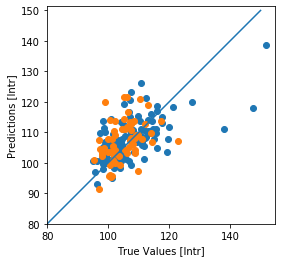

In [31]:
train_predictions = model_Intr.predict(normed_train_data).flatten()
test__predictions = model_Intr.predict(normed_test__data).flatten()
print("{},{}".format(len(train_predictions),len(train_labels_Intr)))
plt.scatter(train_labels_Intr, train_predictions)
plt.scatter(test__labels_Intr, test__predictions )

plt.xlabel('True Values [Intr]')
plt.ylabel('Predictions [Intr]')
plt.axis('equal')
plt.axis('square')
plt.xlim([80,plt.xlim()[1]])
plt.ylim([80,plt.ylim()[1]])
_ = plt.plot([0, 150], [0, 150])

size:  59,59


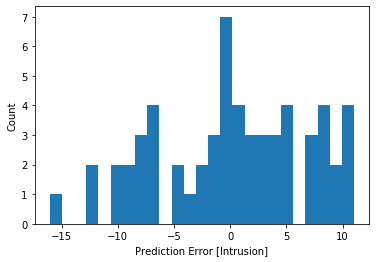

In [38]:
# train_predictions = np.array(train_value)  
# test_predictions  = np.array(test__value) 
print("size:  {},{}".format(len(test__predictions),len(test__labels_Intr)))
# print("type:  {},{}".format(type(test_predictions),type(test_labels__Intr)))
# print("dtype: {},{}".format(test_labels__Intr.dtype,  test_predictions.dtype))
# print("ndim:  {},{}".format(test_labels__Intr.ndim,   test_predictions.ndim))
# print("size:  {},{}".format(test_labels__Intr.size,   test_predictions.size))
# print("nbytes:{},{}".format(test_labels__Intr.nbytes, test_predictions.nbytes))
# data = test__labels_Intr.iloc[0]
# print(type(data))
error = test__predictions - test__labels_Intr

plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Intrusion]")
_ = plt.ylabel("Count")

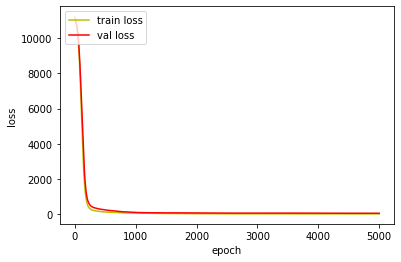

In [33]:
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
# acc_ax = loss_ax.twinx()

hist = model_Intr_history
# hist = model_Intr_early_history 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

# acc_ax.plot(hist.history['mse'], 'b', label='train mse')
# acc_ax.plot(hist.history['val_mse'], 'g', label='val mse')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
# acc_ax.set_ylabel('mse')

loss_ax.legend(loc='upper left')
# acc_ax.legend(loc='lower left')

plt.show()

In [34]:
# train_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\train_dataset_intr_2.csv")
# test_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\test_dataset_intr_2.csv")

pd.DataFrame(train_predictions).to_csv(dir+r"\train_pred_intr.csv")
pd.DataFrame(test__predictions).to_csv(dir+r"\test__pred_intr.csv")

Text(0, 0.5, 'MSE_Intr')

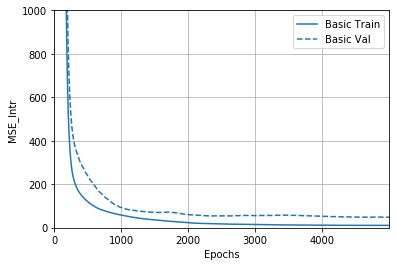

In [35]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Intr_history}, metric = "mse")
plt.ylim([-1, 1000])
plt.ylabel('MSE_Intr')

## M/L for Intursion of region_2

In [36]:
# # create the model for intusion by region_2
EPOCHS = 5000
nPar = 8
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Intr_2 = build_model(iunit, ounit, train_dataset_2, activation=None,loss='mse',metrics=['mse'])
model_Intr_2, model_Intr_2_history, model_Intr_2_early_history = training(EPOCHS, model_Intr_2, normed_train_data_2, train_labels_Intr_2, verbose=0, monitor='mse', patience=5)

model_Intr_2.save(dir+r'\trainingdata_Intr_for_Zone_2.h5')

nPar: 8, nOut: 1, iunit: 8, ounit: 1

Epoch: 0, loss:10138.8419,  mse:10138.7578,  val_loss:9996.3027,  val_mse:9996.2188,  
....................................................................................................
Epoch: 100, loss:9663.5130,  mse:9663.4141,  val_loss:9601.2178,  val_mse:9601.1191,  
....................................................................................................
Epoch: 200, loss:7644.0374,  mse:7643.8491,  val_loss:7975.3706,  val_mse:7975.1812,  
....................................................................................................
Epoch: 300, loss:3758.5458,  mse:3758.2170,  val_loss:4820.3501,  val_mse:4820.0200,  
....................................................................................................
Epoch: 400, loss:1034.8479,  mse:1034.3997,  val_loss:2194.7817,  val_mse:2194.3325,  
....................................................................................................
Epoch: 500, loss:353.8

KeyboardInterrupt: 

In [ ]:
test_mae_score_Intr_2, test_mae_score1_Intr_2 = model_Intr_2.evaluate(  normed_test__data_2, test__labels_Intr_2  )
print(test_mae_score_Intr_2, test_mae_score1_Intr_2)

In [ ]:
train_predictions = model_Intr_2.predict(normed_train_data_2).flatten()
test__predictions = model_Intr_2.predict(normed_test__data_2).flatten()

plt.scatter(train_labels_Intr_2, train_predictions)
plt.scatter(test__labels_Intr_2, test__predictions)

plt.xlabel('True Values [Intr_2]')
plt.ylabel('Predictions [Intr_2]')
plt.axis('equal')
plt.axis('square')
plt.xlim([90,plt.xlim()[1]])
plt.ylim([90,plt.ylim()[1]])
_ = plt.plot([90, 150], [90, 150])

In [ ]:
error = test__predictions - test__labels_Intr_2

plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Intrusion_region2]")
_ = plt.ylabel("Count")

In [ ]:
train_dataset_2.to_csv(dir+r"\train_dataset_intr_2.csv")
test__dataset_2.to_csv(dir+r"\test__dataset_intr_2.csv")

pd.DataFrame(train_predictions).to_csv(dir+r"\train_pred_intr_2.csv")
pd.DataFrame(test__predictions).to_csv(dir+r"\test__pred_intr_2.csv")

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Intr_2_history}, metric = "mse")
plt.ylim([-1, 2000])
plt.ylabel('MSE_Intr_2')

## M/L for Intursion of region_3

In [ ]:
# # create the model for intusion by region_3
EPOCHS = 5000
nPar = 64
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Intr_3 = build_model(iunit, ounit, train_dataset_3, activation=None,loss='mse',metrics=['mse'])
model_Intr_3, model_Intr_3_history, model_Intr_3_early_history = training(EPOCHS, model_Intr_3, normed_train_data_3, train_labels_Intr_3, verbose=0, monitor='mse', patience=5)

model_Intr_3.save(dir+r'\trainingdata_Intr_for_Zone_3.h5')

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Intr_3_history}, metric = "mse")
plt.ylim([-1, 500])
plt.ylabel('MSE_Intr_3')

In [ ]:
test_mae_score_Intr_3, test_mae_score1_Intr_3 = model_Intr_3.evaluate(  normed_test__data_3, test__labels_Intr_3  )
print(test_mae_score_Intr_3, test_mae_score1_Intr_3)

In [ ]:
train_predictions = model_Intr_3.predict(normed_train_data_3).flatten()
test__predictions = model_Intr_3.predict(normed_test__data_3).flatten()

plt.scatter(train_labels_Intr_3, train_predictions)
plt.scatter(test__labels_Intr_3, test__predictions)

plt.xlabel('True Values [Intr_3]')
plt.ylabel('Predictions [Intr_3]')
plt.axis('equal')
plt.axis('square')
plt.xlim([90,plt.xlim()[1]])
plt.ylim([90,plt.ylim()[1]])
_ = plt.plot([90, 150], [90, 150])

In [ ]:
error = test__predictions - test__labels_Intr_3

plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Intrusion_region3]")
_ = plt.ylabel("Count")

In [ ]:
train_dataset_3.to_csv(dir+r"\train_dataset_intr_3.csv")
test__dataset_3.to_csv(dir+r"\test__dataset_intr_3.csv")

pd.DataFrame(train_predictions).to_csv(dir+r"\train_pred_intr_3.csv")
pd.DataFrame(test__predictions).to_csv(dir+r"\test__pred_intr_3.csv")

## M/L for Area reduction

In [ ]:
EPOCHS = 5000
nPar = 64
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Area = build_model(iunit, ounit, train_dataset, activation=None,loss='mse',metrics=['mse'])
model_Area, model_Area_history, model_Area_early_history = training(EPOCHS, model_Area, normed_train_data, train_labels_Area, verbose=0, monitor='mse', patience=5)
model_Area.save(dir+r'\trainingdata_Area_for_Zone.h5')

In [ ]:
test_mae_score_Area, test_mae_score1_Area = model_Area.evaluate(  normed_test__data, test__labels_Area  )
print(test_mae_score_Area, test_mae_score1_Area)

In [ ]:
train_predictions = model_Area.predict(normed_train_data).flatten()
test__predictions = model_Area.predict(normed_test__data).flatten()

plt.scatter(train_labels_Area, train_predictions)
plt.scatter(test__labels_Area, test__predictions )

plt.xlabel('True Values [Area]')
plt.ylabel('Predictions [Area]')
plt.axis('equal')
plt.axis('square')
plt.xlim([-10,plt.xlim()[1]])
plt.ylim([-10,plt.ylim()[1]])
_ = plt.plot([-100, 1000], [-100, 1000])

In [ ]:
error = test__predictions - test__labels_Area

plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Intrusion_Area]")
_ = plt.ylabel("Count")

In [ ]:
# train_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\train_dataset.csv")
# test_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\test_dataset.csv")

pd.DataFrame(train_predictions).to_csv(dir+r"\train_pred_area.csv")
pd.DataFrame(test__predictions).to_csv(dir+r"\test__pred_area.csv")

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Area_history}, metric = "mse")
plt.ylim([-0.1, 1000])
plt.ylabel('MSE_Area')

In [ ]:
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
# plotter.plot({'Early Stopping': early_history}, metric = "mae")
# plt.ylim([-1, 10])
# plt.ylabel('MAE')

In [ ]:
# study for dataframe
# data = {'a':[1,2,3.0],'b':[0.1,0.2,0.3],'sub':['1st','2nd','3nd']}
# df = pd.DataFrame(data)
# df
# df = pd.DataFrame(data, columns=['sub','a','b'])
# df
# df = df.reindex(index = [0,2,1])
# df
# df['c']=np.nan
# df
# df.loc[:,['c']]=[1,2,3]
# df

In [ ]:
# model evaluate by curve
# model = keras.models.load_modelr'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_for_Zone.h5')
# test_predictions = model.predict(normed_test_data).flatten()
# test_predictions = model.predict(normed_test_data)
# print("normed_test_data: {}".format(normed_test_data))
# print("test_dataset    : {}".format(test_dataset))
# print("test_predictions: {}".format(test_predictions))


# Optimization

In [ ]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential, load_model
from scipy import optimize
import time


In [ ]:
# Number of Curve points
point = 39
# Number of variables 
var = 8

In [ ]:
# predict_func
# Mean square error between test and prediction

def predict_func( lst ):
    import math
    # # Result of prediction data 
    reg = 0 
    
    lstVar  = [ var  for var  in lst    ]

    lstVarN = [ norm(varN, train_stats) for varN in lstVar ]

    predict_Reg  = model_Reg.predict( [lstVarN] )[0]
    predict_Intr = model_Intr.predict( [lstVarN] )[0]

    predict_Intr_2 = model_Intr_2.predict( [lstVarN] )[0]
    predict_Intr_3 = model_Intr_3.predict( [lstVarN] )[0]

    predict_Area = model_Area.predict( [lstVarN] )[0]

    # cVal = 0
    # sInt = 0 
    # sAre = 0
    # sReg = 0

    # for i in range(0,len(predict)):
    #     if i <= 20: # curve data
    #         cVal = cVal + predict[i]
    #     if i == 21: # max. intrusion
    #         sInt = predict[i]
    #     if i == 22: # area
    #         sAre = predict[i]
    #     if i == 23: # region
    #         sReg = predict[i]

    # lst_max = (dataset.max(0))
    # lst_min = (dataset.min(0))
    # print("max={}, min={} of first Column".format(lst_max[1],lst_min[1] ))

    if predict_Reg[0] > predict_Reg[1] :
        predict_Intr = predict_Intr_2
        reg = 0
    else:
        predict_Intr = predict_Intr_3
        reg = 1
    

    # if predict_Reg < 2.5:
    #     predict_Intr = predict_Intr_2
    # else:
    #     predict_Intr = predict_Intr_3

    norm_Int  = math.sqrt( ((predict_Intr - lst_min[29])/(lst_max[29] - lst_min[29]))**2 ) 
    norm_Int_2  = math.sqrt( ((predict_Intr_2 - lst_min[29])/(lst_max[29] - lst_min[29]))**2 ) 
    norm_Int_3  = math.sqrt( ((predict_Intr_3 - lst_min[29])/(lst_max[29] - lst_min[29]))**2 ) 

    norm_Area = math.sqrt( ((predict_Area - lst_min[30])/(lst_max[30] - lst_min[30]))**2 ) 


    # print("min: {}, max: {}".format(lst_min[30], lst_max[30]))
    print("parameter: {}".format(lstVar))
    print("Region: {}, Intursion: {}, Area: {}".format(reg, predict_Intr, predict_Area))

    # weight1 = 0.2


    return  norm_Int + norm_Area


In [ ]:
# normed_train_data_3

In [ ]:
# 1st
bnds = [( 25, 200 ), ( 25, 200 ), ( 25, 200 ), ( 25, 200 ),
        ( 30, 200 ), ( 30, 200 ), ( 30, 200 ), ( 30, 200 )
]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")


In [ ]:
# Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

In [ ]:
#Second
bnds = [( 25, 200 ), ( 25, 200 ), ( 25, 200 ), ( 25, 200 ),
        ( 30, 200 ), ( 30, 200 ), ( 30, 200 ), ( 30, 200 )
]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

In [ ]:
# 2nd: Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

In [ ]:
#Third
bnds = [( 25, 200 ), ( 25, 200 ), ( 25, 200 ), ( 25, 200 ),
        ( 30, 200 ), ( 30, 200 ), ( 30, 200 ), ( 30, 200 )
]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

In [ ]:
# 3nd: Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

In [ ]:
# normed_test_data

# test_predictions = model.predict(normed_test_data)
# print("normed_test_data: {}".format(normed_test_data))
# print("test_dataset    : {}".format(test_dataset))
# print("test_predictions: {}".format(test_predictions))